# アルゴリズムで利用するモジュール作成

In [295]:
# 遺伝子の作成
def generate_gene(x, y):
    gene = []
    for i in range(len(x)):
        gene.append((x.values[i], y.values[i]))
    return gene

In [296]:
# 評価関数の作成
def reputate(genes_sample):
    f = []
    for i in range(m):
        x = []
        y = []
        d = []
        for j in range(n):
            x.append(genes_sample[i][j][0])
            y.append(genes_sample[i][j][1])
        for k in range(n-1):
            d.append(np.sqrt((x[k] - x[k+1]) ** 2 + (y[k] - y[k+1]) ** 2))
        f.append(np.array(d).sum())
    return f

In [297]:
# 子の作成
def generate_child(parent1_ori, parent2_ori):
    while True:
        generated_gene = parent1_ori.copy()
        parent1 = parent1_ori.copy()
        parent2 = parent2_ori.copy()
        list1 = []
        list2 = list(range(0, n))
        i = 0
        while True:
            a = randint(0, n-1)
            if not any(np.in1d(list1, a)):
                list1.append(a)
                list2.remove(list1[-1])
                i += 1
            if i == 3:
                break

        for j in list1:
            generated_gene[j] = parent1[j]
            parent2.remove(parent1[j])
        for (j, k) in zip(list2, range(0, len(parent2))):
            generated_gene[j] = parent2[k]

        if (generated_gene != parent1) and (generated_gene != parent2):
            break

    return generated_gene

In [298]:
# 突然変異の実装（毎ループで施行される）
def mutation(gene):
    num1, num2 = randint(0, n-1), randint(0, n-1)
    tmp = gene[num1]
    gene[num1] = gene[num2]
    gene[num2] = tmp
    return gene

# プログラム

In [299]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle, randint, sample

1世代
経路長：34.88777956073679
2世代
経路長：31.279841213569917
3世代
経路長：32.225101794765756
4世代
経路長：31.990399959598157
5世代
経路長：31.674345644067394
6世代
経路長：31.674345644067394
7世代
経路長：31.674345644067394
8世代
経路長：30.282282555544874
9世代
経路長：29.673509813470844
10世代
経路長：29.673509813470844
11世代
経路長：30.08188338813696
12世代
経路長：30.08188338813696
13世代
経路長：30.08188338813696
14世代
経路長：30.08188338813696
15世代
経路長：30.08188338813696
16世代
経路長：30.08188338813696
17世代
経路長：30.08188338813696
18世代
経路長：30.08188338813696
19世代
経路長：30.08188338813696
20世代
経路長：30.08188338813696
21世代
経路長：30.08188338813696
22世代
経路長：30.08188338813696
23世代
経路長：30.08188338813696
24世代
経路長：30.08188338813696
25世代
経路長：30.08188338813696
26世代
経路長：30.08188338813696
27世代
経路長：30.08188338813696
28世代
経路長：30.08188338813696
29世代
経路長：30.08188338813696
30世代
経路長：30.08188338813696
31世代
経路長：30.08188338813696
32世代
経路長：30.08188338813696
33世代
経路長：30.08188338813696
34世代
経路長：30.08188338813696
35世代
経路長：30.08188338813696
36世代
経路長：30.08188338813696
37世代
経路長：30.08188338813696
3

308世代
経路長：21.938299606103612
309世代
経路長：21.938299606103612
310世代
経路長：21.938299606103612
311世代
経路長：21.938299606103612
312世代
経路長：21.938299606103612
313世代
経路長：21.938299606103612
314世代
経路長：21.938299606103612
315世代
経路長：21.938299606103612
316世代
経路長：21.938299606103612
317世代
経路長：21.938299606103612
318世代
経路長：21.938299606103612
319世代
経路長：21.938299606103612
320世代
経路長：21.938299606103612
321世代
経路長：21.938299606103612
322世代
経路長：21.938299606103612
323世代
経路長：21.938299606103612
324世代
経路長：21.938299606103612
325世代
経路長：21.938299606103612
326世代
経路長：21.938299606103612
327世代
経路長：21.938299606103612
328世代
経路長：21.938299606103612
329世代
経路長：21.938299606103612
330世代
経路長：21.938299606103612
331世代
経路長：21.938299606103612
332世代
経路長：21.938299606103612
333世代
経路長：21.938299606103612
334世代
経路長：21.938299606103612
335世代
経路長：21.938299606103612
336世代
経路長：21.938299606103612
337世代
経路長：21.938299606103612
338世代
経路長：21.938299606103612
339世代
経路長：21.938299606103612
340世代
経路長：21.938299606103612
341世代
経路長：21.938299606103612
342世代
経路長：21.9

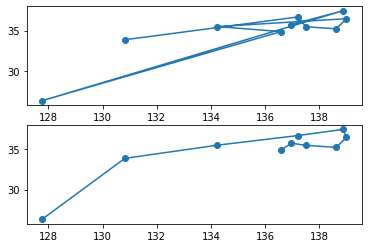

In [300]:
n = 10   # 都市数
m = 10   # 個体数
loop = 500   # ループ回数
generation = 1   # 世代
reputation_hist = []   # 評価値の保存

# データの読み込み
japan = pd.read_csv('jp.csv')
cities = japan.sample(n)
cities = cities[['city', 'lat', 'lng']]
cities.head()

x = cities['lng']
y = cities['lat']
plt.subplot(2, 1, 1)
plt.scatter(x, y)
plt.plot(x, y)

# 経路
gene_0 = generate_gene(x, y)

# ランダムな経路10通りの遺伝子を生成
genes = []
for _ in range(10):
    gene_0 = sample(gene_0, n)
    genes.append(gene_0)

for _ in range(0, loop):
    # 評価
    reputated_genes = reputate(genes)

    # データ準備
    d = {'gene1': [genes[0], reputated_genes[0]],
         'gene2': [genes[1], reputated_genes[1]],
        'gene3': [genes[2], reputated_genes[2]],
        'gene4': [genes[3], reputated_genes[3]],
        'gene5': [genes[4], reputated_genes[4]],
        'gene6': [genes[5], reputated_genes[5]],
        'gene7': [genes[6], reputated_genes[6]],
        'gene8': [genes[7], reputated_genes[7]],
        'gene9': [genes[8], reputated_genes[8]],
        'gene10': [genes[9], reputated_genes[9]]}

    df = pd.DataFrame(data=d, index=['gene', 'reputation'])
    df = df.T
    df = df.sort_values('reputation')
    df
    
    # 評価値のリスト
    reputation_hist.append(df['reputation'][0])
    
    # 世代数のカウント
    print(f'{generation}世代')
    print(f'経路長：{reputation_hist[-1]}')
    generation += 1

    # 評価値上位2つを選択し、新たな遺伝子に加える。ただし同じ配列のものは選ばない。
    genes = []
    genes.append(df['gene'][0])
    for i in range(len(df['gene'])):
        genes.append(df['gene'][i])
        if genes[0] == df['gene'][i]:
              genes.remove(genes[-1])
        else:
            break
#     if len(genes)==1:
#         genes.append(sample(gene_0, n))

    # 子を6つ作成し、新たな遺伝子に加える
    for _ in range(0, 3):
        genes.append(generate_child(genes[0], genes[1]))
        genes.append(generate_child(genes[1], genes[0]))

#     # ランダムな遺伝子を2つ作成し、新たな遺伝子に加える
#     for _ in range(0, 2):
#         genes.append(sample(gene_0, n))
        
    # 突然変異
    genes.append(mutation(genes[0]))
    genes.append(mutation(genes[0]))
    
best_gene = df['gene'][0]
best_x = []
best_y = []
for i in range(0, len(best_gene)):
    best_x.append(best_gene[i][0])
    best_y.append(best_gene[i][1])
plt.subplot(2, 1, 2)
plt.scatter(best_x, best_y)
plt.plot(best_x, best_y)
plt.show()

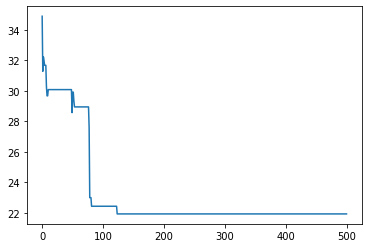

In [301]:
plt.plot(np.linspace(0, loop, loop), reputation_hist)